In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/titanic_toy (1).csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


now we are filling the missing value by arbitry value
eg age take 99,-1 because differentiate from other **bold text**

<Axes: >

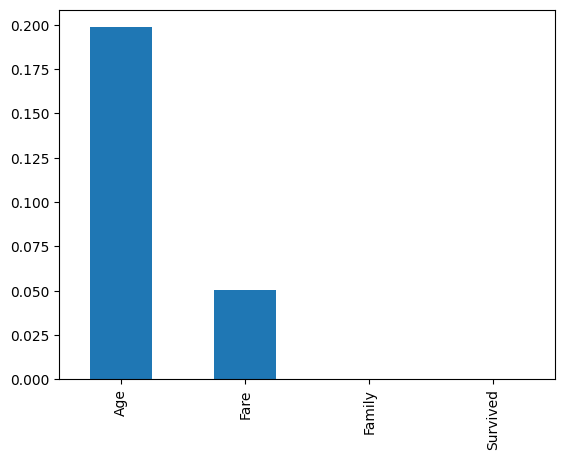

In [ ]:
df.isnull().mean().plot(kind='bar')

In [ ]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


In [ ]:
# now fill the missing value with the age and fare
x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Fare_999']=x_train['Fare'].fillna(999)
x_train['Age_-1']=x_train['Age'].fillna(-1)
x_train['Fare_-1']=x_train['Fare'].fillna(-1)

In [ ]:
# now check the varience
print(x_train['Age'].var())
print(x_train['Age_99'].var())
print(x_train['Age_-1'].var())
print(x_train['Fare'].var())
print(x_train['Fare_999'].var())
print(x_train['Fare_-1'].var())

210.2517072477438
932.9665366701436
315.99550362600644
2761.031434948639
47525.47059536007
2675.2394049177087


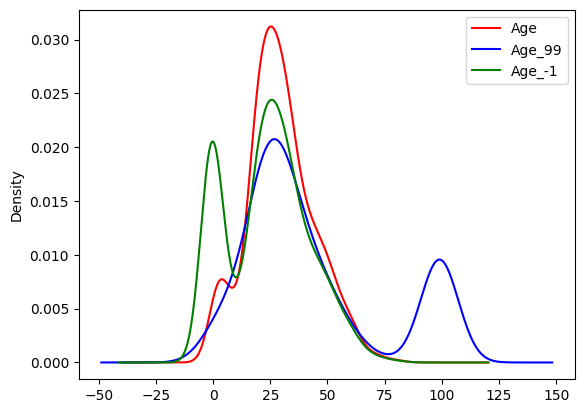

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
x_train['Age'].plot(kind='kde',ax=ax,color='red')
x_train['Age_99'].plot(kind='kde',ax=ax,color='blue')
x_train['Age_-1'].plot(kind='kde',ax=ax,color='green')
ax.legend(['Age','Age_99','Age_-1'])

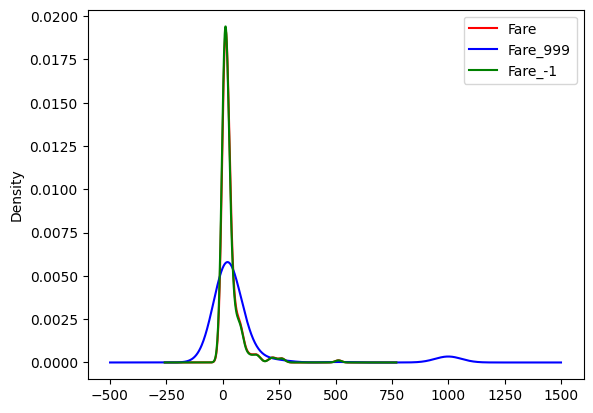

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
x_train['Fare'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_999'].plot(kind='kde',ax=ax,color='blue')
x_train['Fare_-1'].plot(kind='kde',ax=ax,color='green')
ax.legend(['Fare','Fare_999','Fare_-1'])

In [ ]:
# check the covarience and correlation
x_train.corr()

,Age,Fare,Family,Age_99,Fare_999,Age_-1,Fare_-1
Age,1.000000,0.091482,-0.319651,1.000000,0.039967,1.000000,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,1.000000,0.145071,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,0.046016,-0.168329,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.038303,-0.306576,-0.064017
Fare_999,0.039967,1.000000,0.046016,-0.038303,1.000000,0.067792,0.094357
Age_-1,1.000000,0.145071,-0.168329,-0.306576,0.067792,1.000000,0.135159
Fare_-1,0.085422,1.000000,0.203212,-0.064017,0.094357,0.135159,1.000000


In [ ]:
x_train.cov()

,Age,Fare,Family,Age_99,Fare_999,Age_-1,Fare_-1
Age,210.251707,75.481375,-6.993325,210.251707,130.495777,210.251707,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,2761.031435,135.785804,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,16.878492,-5.034556,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-255.051165,-166.460682,-101.137070
Fare_999,130.495777,2761.031435,16.878492,-255.051165,47525.470595,262.712284,1063.944817
Age_-1,210.251707,135.785804,-5.034556,-166.460682,262.712284,315.995504,124.270305
Fare_-1,69.137162,2761.031435,17.684447,-101.137070,1063.944817,124.270305,2675.239405


In [ ]:
#using sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


In [ ]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)


In [ ]:

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
x_train=trf.fit_transform(x_train)

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
x_test = trf.transform(x_test)

In [ ]:
x_train


array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

arbitary value
1.normally distrubuted


1.   mean+3 s.d
2.   mean-3.s.d

2.skew datset



1.  q1-1.5iqr
2.   q3+1.5iqr

iqr=q3-q1



